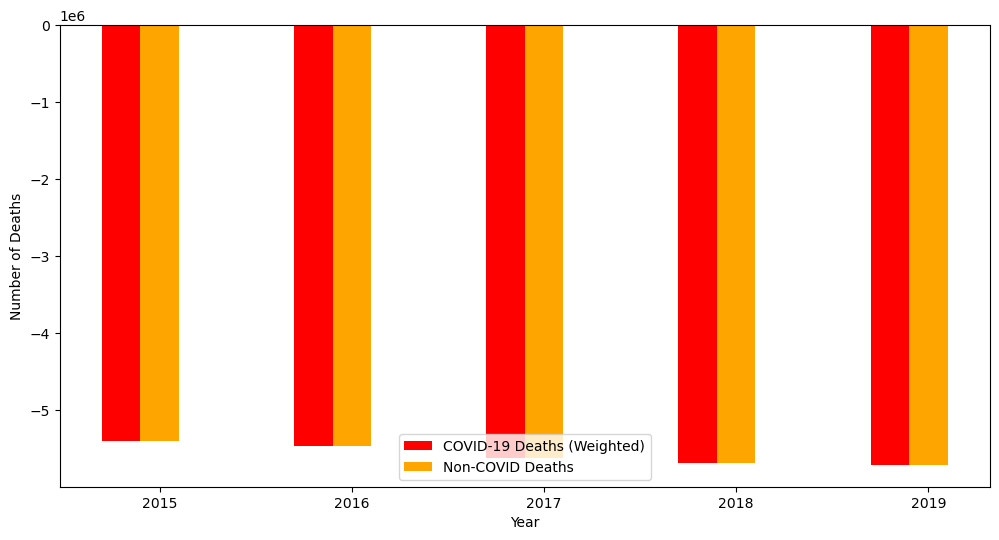

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('C:\\Users\\jeet\\Downloads\\US CDC AH_Excess_Deaths_by_Sex__Age__and_Race - 21jan2022byage.csv')

# Filter data for the years 2015-2019
df_years_15_19 = df[(df['MMWRyear'] >= 2015) & (df['MMWRyear'] <= 2019)]

# Group by MMWRyear and sum the COVID-19 and non-COVID-19 deaths
df_grouped = df_years_15_19.groupby('MMWRyear').agg({'COVID19 (weighted)': 'sum', 'COVID19 (unweighted)': 'sum', 'Deaths (weighted)': 'sum'})

# Calculate non-COVID-19 deaths
df_grouped['Non-COVID Deaths'] = df_grouped['Deaths (weighted)'] - df_grouped['COVID19 (weighted)']

# Calculate the absolute difference
df_grouped['Weighted Difference'] = abs(df_grouped['COVID19 (weighted)'] - df_grouped['Non-COVID Deaths'])
df_grouped['Unweighted Difference'] = abs(df_grouped['COVID19 (unweighted)'] - df_grouped['Non-COVID Deaths'])


plt.figure(figsize=(12, 6))
bar_width = 0.2

# Bar for COVID-19 deaths (weighted)
plt.bar(df_grouped.index - bar_width, -df_grouped['Weighted Difference'], color='red', width=bar_width, label='COVID-19 Deaths (Weighted)')

# Bar for non-COVID-19 deaths
plt.bar(df_grouped.index, -df_grouped['Non-COVID Deaths'], color='orange', width=bar_width, label='Non-COVID Deaths')

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()
